In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

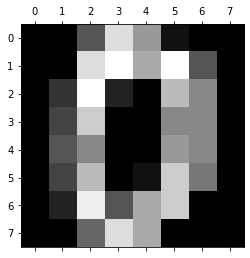

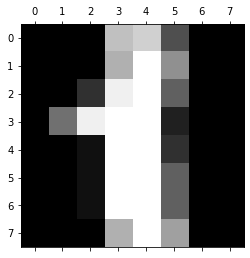

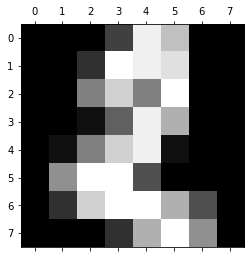

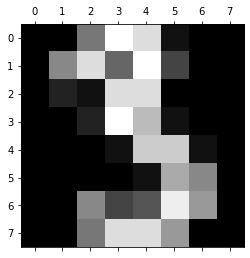

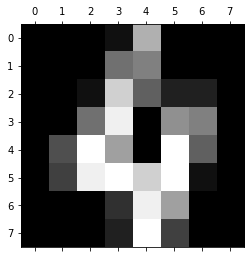

In [8]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [9]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [12]:
len(X_train)

1437

In [13]:
len(X_test)

360

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
model.fit(X_train, y_train)

/Users/reza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
model.score(X_test, y_test)

0.975

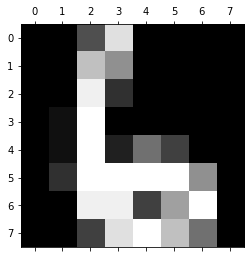

In [17]:
plt.matshow(digits.images[67])

In [18]:
digits.target[67]

6

In [21]:
model.predict([digits.data[67]])

array([6])

In [26]:
# model.predict(digits.data[:5])
model.predict_proba(digits.data[:5])

array([[9.99999997e-01, 6.06880693e-20, 5.31152600e-14, 1.88105172e-13,
        4.14609694e-12, 3.19401090e-09, 6.80470655e-11, 1.53086393e-10,
        2.77145276e-11, 2.82351806e-11],
       [9.99427211e-18, 9.99999075e-01, 2.11932869e-10, 4.58315749e-11,
        7.38632160e-07, 1.04284085e-13, 6.21609035e-10, 1.17515243e-11,
        1.85426858e-07, 4.40380835e-11],
       [1.03030254e-13, 5.08039556e-03, 9.94913235e-01, 6.74286149e-14,
        1.71437551e-12, 7.78782217e-19, 4.59935096e-08, 2.09997358e-11,
        6.32353413e-06, 1.01872611e-15],
       [4.86996084e-14, 1.68102548e-11, 1.59763043e-08, 9.99999340e-01,
        1.70343159e-17, 1.15139850e-09, 6.09646635e-14, 1.59588084e-11,
        4.24828869e-09, 6.38160712e-07],
       [1.94235929e-10, 4.50033778e-06, 3.97609478e-17, 1.09943011e-20,
        9.99606089e-01, 3.06296755e-17, 3.89393651e-04, 1.00502954e-11,
        1.69886038e-08, 1.86429127e-21]])

In [25]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[50,  0,  0,  0,  1,  1,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  1,  0,  0,  2,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 25]])

Text(69.0, 0.5, 'Truth')

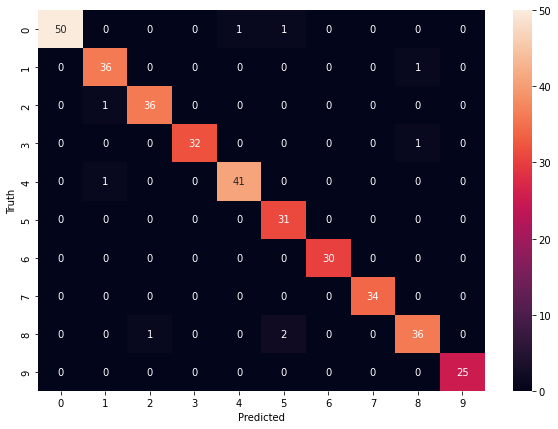

In [27]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')